# ***EDA***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


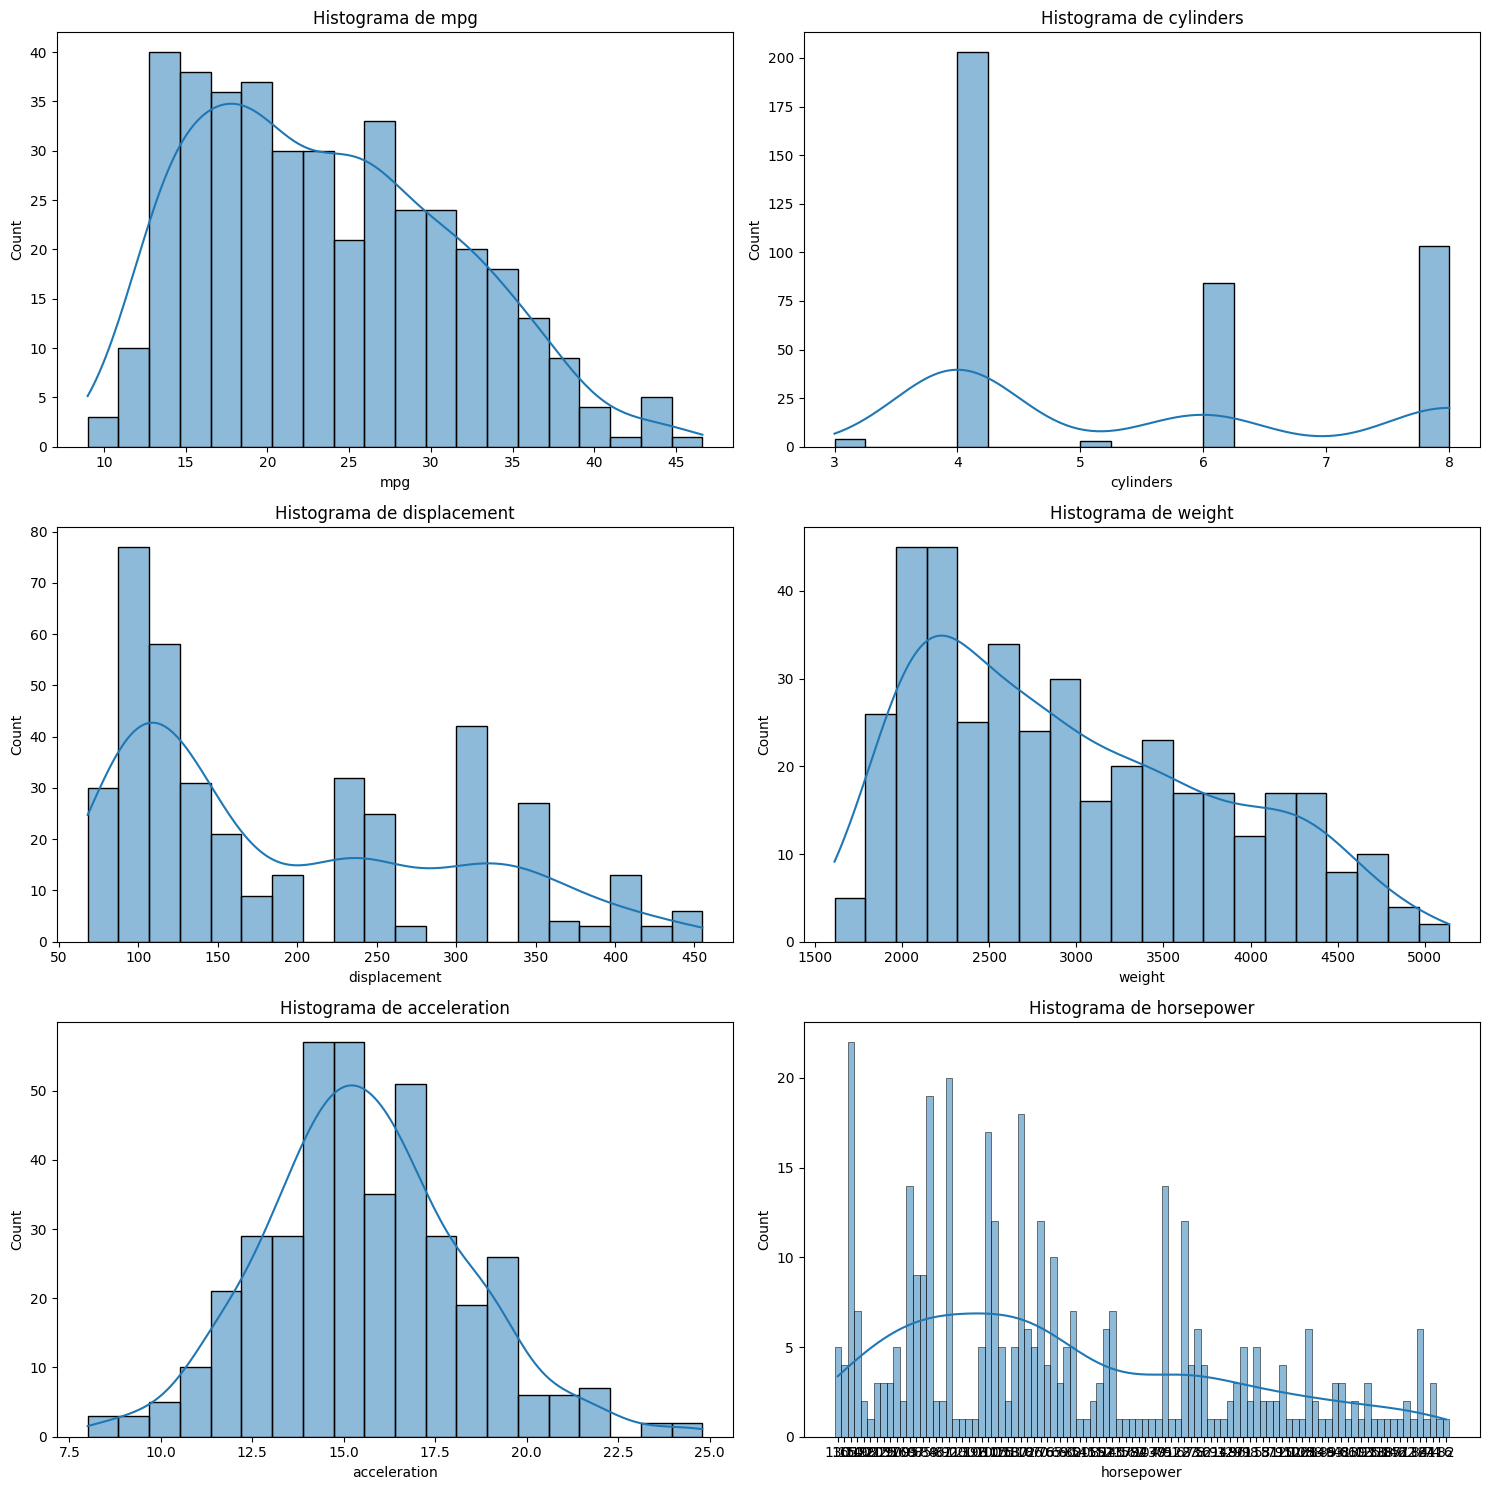

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de datos - Histogramas
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
variables = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'horsepower']
for i, var in enumerate(variables):
    sns.histplot(data[var], bins=20, kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Histograma de {var}')

plt.tight_layout()
plt.show()


***Histogramas:***

* mpg (millas por galón) muestra una distribución bimodal, indicando dos grupos predominantes en el consumo de combustible.
* cylinders tiene picos claros en valores específicos (4, 6 y 8 cilindros), lo que es típico dado que los cilindros en un motor son cantidades fijas y comunes.
* displacement, weight, y acceleration muestran distribuciones relativamente normales o log-normales.
* horsepower parece tener una distribución con una cola hacia valores más altos, indicativo de algunos autos con alta potencia.
  



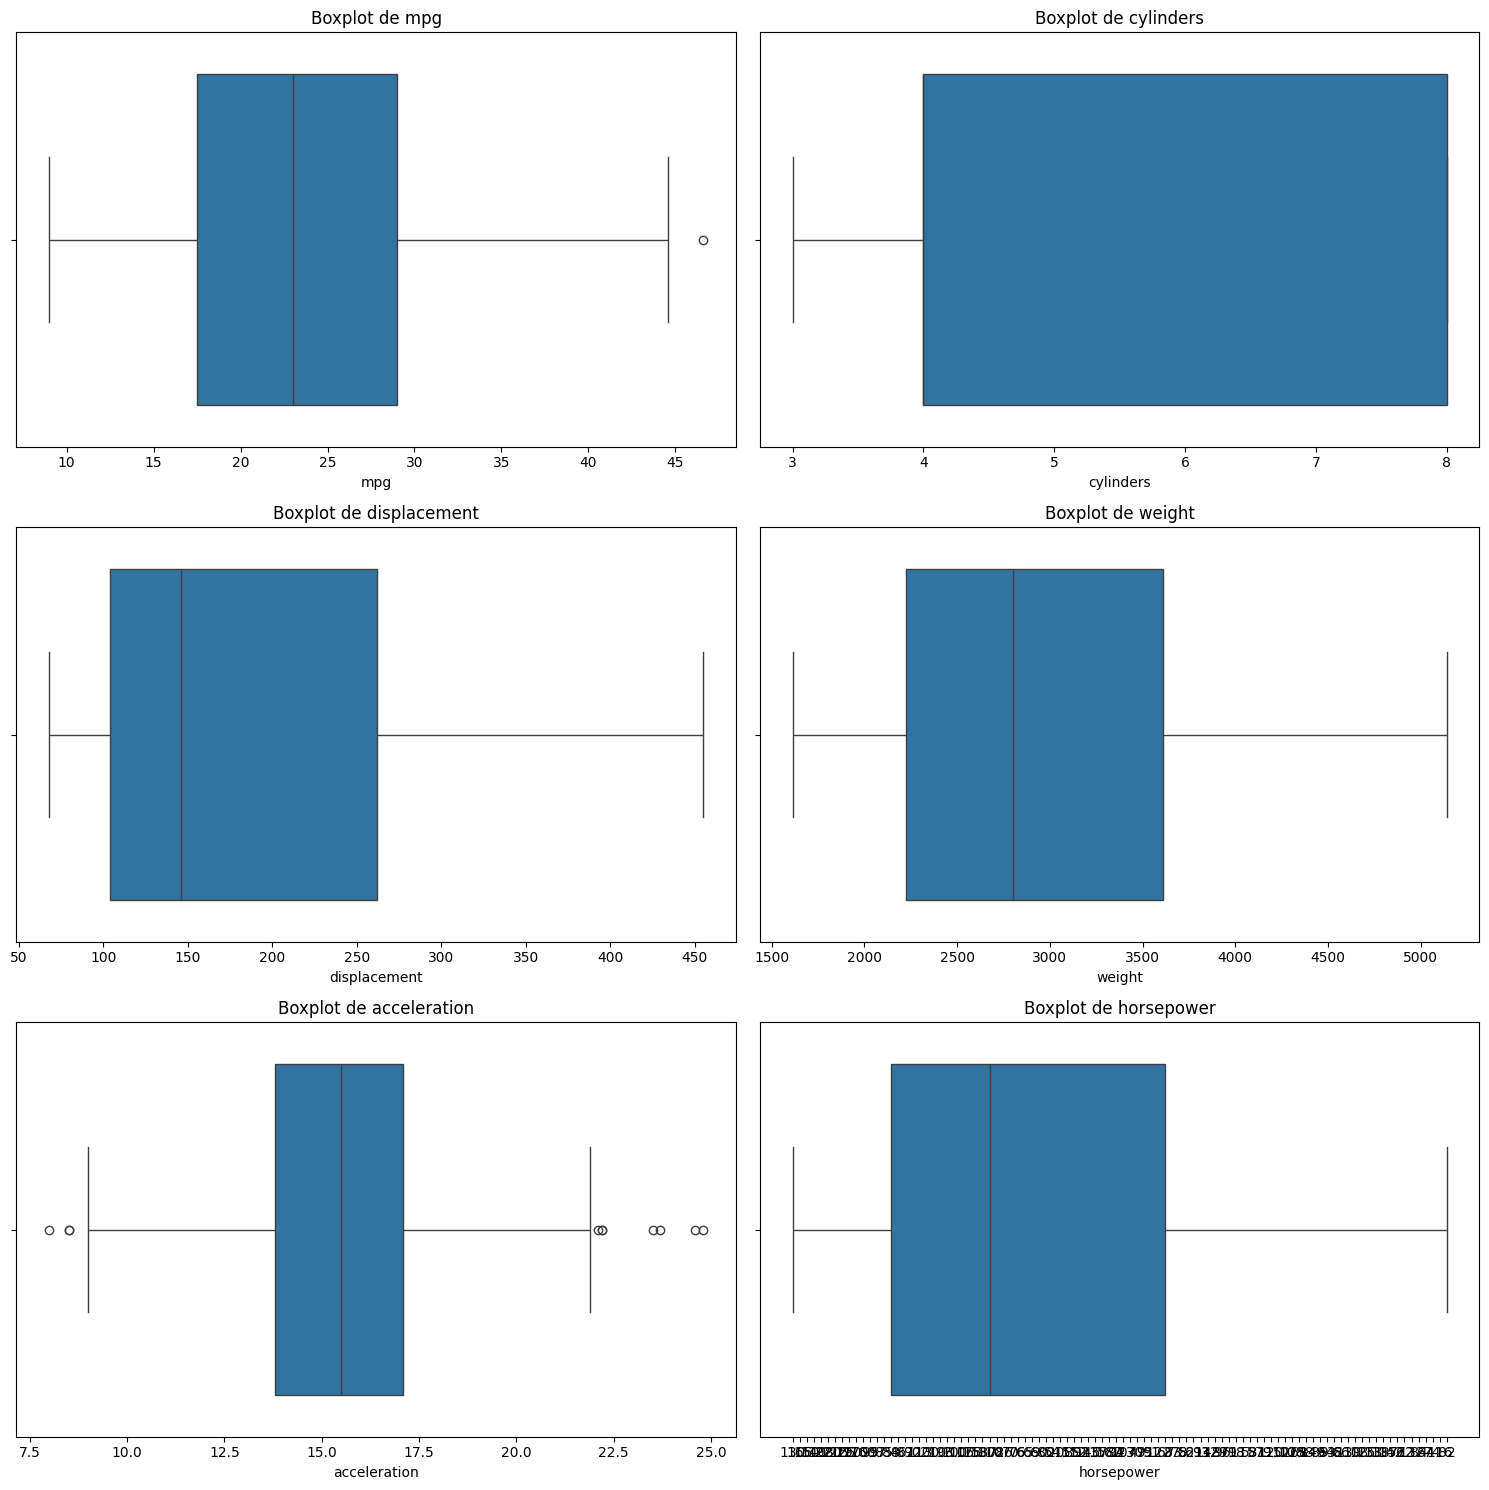

In [ ]:

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, var in enumerate(variables):
    sns.boxplot(x=data[var], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

Los boxplots revelan varios valores atípicos en mpg, displacement, weight, y horsepower. Estos valores extremos podrían representar modelos de autos específicos que son significativamente diferentes de la mayoría (como deportivos o vehículos muy pesados).

In [ ]:
def outliers_iqr(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identificar valores atípicos en 'horsepower', 'weight' y 'displacement'
outliers_horsepower = outliers_iqr(data, 'horsepower')
outliers_weight = outliers_iqr(data, 'weight')
outliers_displacement = outliers_iqr(data, 'displacement')

# Unir los resultados para obtener una lista única de autos con al menos una característica atípica
outliers_combined = pd.concat([outliers_horsepower, outliers_weight, outliers_displacement]).drop_duplicates()
outliers_combined.sort_values(by=['horsepower', 'weight', 'displacement'], ascending=False)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
94,13.0,8,440.0,215.0,4735,11.0,73,1,chrysler new yorker brougham
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
27,11.0,8,318.0,210.0,4382,13.5,70,1,dodge d200
67,11.0,8,429.0,208.0,4633,11.0,72,1,mercury marquis


Estos modelos de vehículos generalmente tienen motores grandes y potentes, son más pesados y muestran eficiencia de combustible reducida (bajo mpg). Estas características son típicas de autos deportivos de alta potencia o vehículos grandes como camionetas o SUVs.

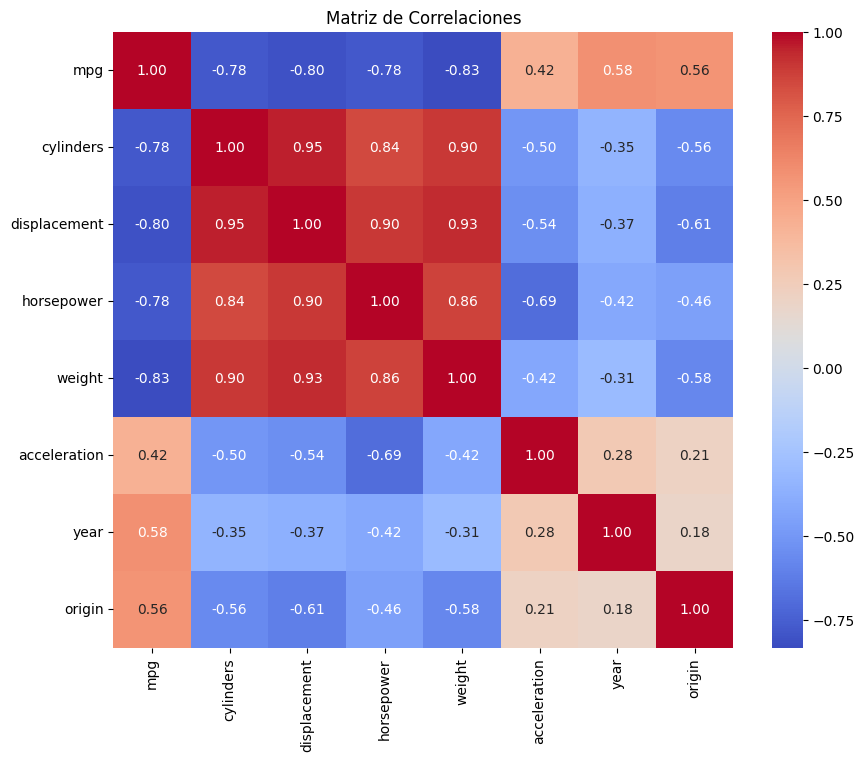

In [ ]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm")
plt.title("Matriz de Correlaciones")
plt.show()

Relación negativa entre mpg (millas por galón) y varios factores: Observamos fuertes correlaciones negativas entre mpg y cylinders, displacement, horsepower y weight. Esto indica que a medida que el número de cilindros, el desplazamiento, la potencia y el peso del vehículo aumentan, el rendimiento de combustible tiende a disminuir.

Relaciones positivas y fuertes entre características del motor y peso: cylinders, displacement, horsepower y weight están altamente correlacionados entre sí. Esto sugiere que los vehículos más pesados tienden a tener motores más grandes y potentes.

Acceleration y su relación con otras variables: La aceleración muestra una correlación moderada y negativa con cylinders, displacement, horsepower y weight, lo que puede indicar que vehículos más pesados y potentes tienden a acelerar más lentamente.

Correlación de year y origin con otras características: Year tiene una correlación positiva con mpg y negativa con características como cylinders y displacement. Esto puede reflejar mejoras en la eficiencia del combustible a lo largo de los años. Por otro lado, origin tiene una correlación positiva con mpg y negativa con características como weight, lo cual puede indicar diferencias en los estándares de fabricación y diseño entre regiones.


# ***PIPELINE***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np

data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

imputer = SimpleImputer(strategy='mean')
data['horsepower'] = imputer.fit_transform(data[['horsepower']])

X = data.drop(['mpg', 'name','origin'], axis=1)
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.head(), y_train.head()


(     cylinders  displacement  horsepower  weight  acceleration  year
 64           8         318.0       150.0    4135          13.5    72
 55           4          97.0        60.0    1834          19.0    71
 316          6         225.0        90.0    3381          18.7    80
 102          4          97.0        46.0    1950          21.0    73
 261          6         258.0       120.0    3410          15.1    78,
 64     15.0
 55     27.0
 316    19.1
 102    26.0
 261    18.1
 Name: mpg, dtype: float64)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np

models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=0)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=0)),
    ('KNN', KNeighborsRegressor())
]

numeric_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Evaluar cada modelo
results = []
best_model = None
best_score = float('inf')

for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    results.append((name, cv_scores))
    mean_score = np.mean(-cv_scores)
    std_score = np.std(-cv_scores)
    print(f"{name}: Mean MSE = {mean_score:.2f}, Std Dev = {std_score:.2f}")
    print(f"{name}: Mean RMSE = {np.sqrt(mean_score):.2f}, Std Dev = {np.sqrt(std_score):.2f}")

    if mean_score < best_score:
        best_score = mean_score
        best_model = pipeline

results

Linear Regression: Mean MSE = 13.02, Std Dev = 3.58
Linear Regression: Mean RMSE = 3.61, Std Dev = 1.89
Decision Tree: Mean MSE = 16.87, Std Dev = 5.67
Decision Tree: Mean RMSE = 4.11, Std Dev = 2.38
Random Forest: Mean MSE = 9.29, Std Dev = 2.39
Random Forest: Mean RMSE = 3.05, Std Dev = 1.55
KNN: Mean MSE = 10.32, Std Dev = 2.16
KNN: Mean RMSE = 3.21, Std Dev = 1.47


[('Linear Regression',
  array([-14.60176396, -16.08361939, -16.18707503,  -6.69000954,
         -11.54026091])),
 ('Decision Tree',
  array([-23.89578125, -20.5359375 , -19.53365079, -11.20174603,
          -9.18968254])),
 ('Random Forest',
  array([-10.13702122, -10.22905864, -12.62231975,  -5.52544594,
          -7.94812038])),
 ('KNN',
  array([ -9.64148125, -11.52551875, -13.80500317,  -7.55659683,
          -9.06365079]))]

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration', 'year',
                                                   'origin'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [ ]:
y_pred = best_model.predict(X_test)
y_pred

array([14.24 , 24.94 , 14.395, 20.601, 18.418, 30.915, 35.177, 21.445,
       15.155, 27.48 , 32.86 , 35.867, 18.553, 25.431, 38.202, 23.557,
       23.616, 38.663, 16.843, 24.919, 15.825, 27.781, 28.222, 20.502,
       35.917, 20.457, 28.053, 28.662, 26.79 , 16.047, 20.331, 30.967,
       16.908, 24.978, 18.83 , 23.752, 29.558, 29.904, 34.81 , 11.9  ,
       13.915, 15.06 , 34.115, 31.597, 30.494, 21.91 , 20.935, 28.637,
       21.768, 30.626, 24.769, 25.631, 16.03 , 27.165, 15.236, 12.31 ,
       18.704, 37.436, 19.617, 16.786, 18.631, 29.321, 19.211, 21.243,
       13.175, 14.77 , 13.725, 17.144, 15.203, 14.495, 16.086, 12.87 ,
       23.598, 31.937, 24.249, 25.387, 24.673, 30.931, 19.788, 14.67 ])

Mean Squared Error (MSE): 4.705726887499984
Root Mean Squared Error (RMSE): 2.169268744876942


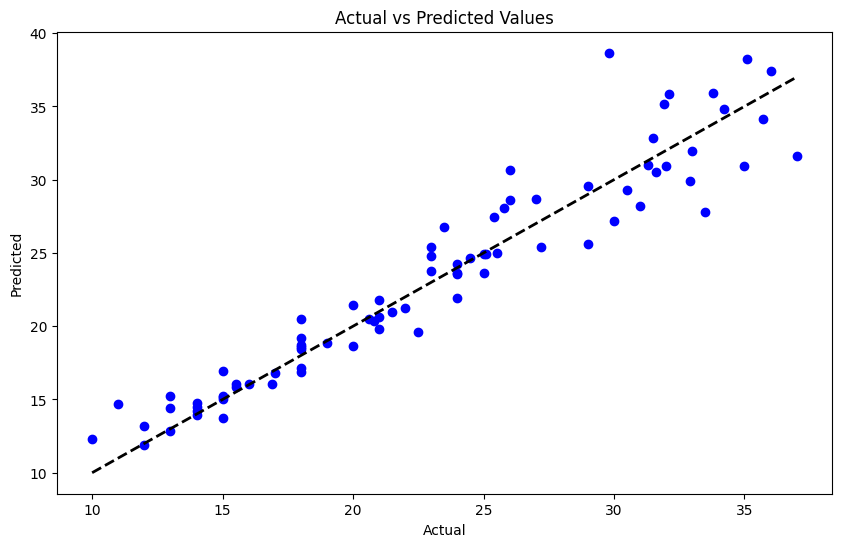

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


## Conclusiones

El modelo `RandomForestRegressor` ha sido evaluado utilizando el conjunto de prueba. Las métricas de evaluación obtenidas indican el rendimiento del modelo:

El gráfico de valores reales vs. valores predichos muestra cómo de cerca están los valores predichos (en el eje y) respecto a los valores reales (en el eje x). En un modelo perfecto, todos los puntos estarían exactamente sobre la línea diagonal (línea de identidad), lo que significaría que el valor predicho es igual al valor real para todas las muestras.

- **Distribución de puntos**: La dispersión de los puntos alrededor de la línea diagonal nos da una idea de la precisión del modelo. Puntos más cercanos a la línea diagonal indican mejores predicciones. Si los puntos están dispersos de manera uniforme alrededor de la línea, sugiere que no hay sesgo sistemático en las predicciones.
- **Patrones y tendencias**: Si observamos algún patrón o tendencia específica (por ejemplo, si los puntos se desvían sistemáticamente hacia arriba o hacia abajo en alguna región), podría indicar problemas específicos del modelo o características de los datos que no se están capturando adecuadamente.
- **Outliers**: Los puntos que están lejos de la línea diagonal son considerados outliers. Estos pueden indicar instancias donde el modelo no ha funcionado bien, lo que puede deberse a la naturaleza de los datos o a posibles errores en el modelo.
